### Linear Regression 

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. It work on the principle of ordinary least square  (OLS)  / Mean square errror  (MSE) . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

### Content
The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

### Acknowledgements
The data are taken from the United States National Oceanic and Atmospheric Administration (https://www.kaggle.com/noaa) National Centres for Environmental Information website: https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data

Inspiratio

### Import Library and Dataset
Now we will import couple of python library required for our analysis and import dataset

In [48]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [49]:
Weather =pd.read_csv('Summary of Weather.csv')

climate= pd.DataFrame(Weather)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
climate.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
climate.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [52]:
climate.info

<bound method DataFrame.info of           STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889      0.0        

In [53]:
climate.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [54]:
climate.shape


(119040, 31)

In [55]:
list(climate)


['STA',
 'Date',
 'Precip',
 'WindGustSpd',
 'MaxTemp',
 'MinTemp',
 'MeanTemp',
 'Snowfall',
 'PoorWeather',
 'YR',
 'MO',
 'DA',
 'PRCP',
 'DR',
 'SPD',
 'MAX',
 'MIN',
 'MEA',
 'SNF',
 'SND',
 'FT',
 'FB',
 'FTI',
 'ITH',
 'PGT',
 'TSHDSBRSGF',
 'SD3',
 'RHX',
 'RHN',
 'RVG',
 'WTE']

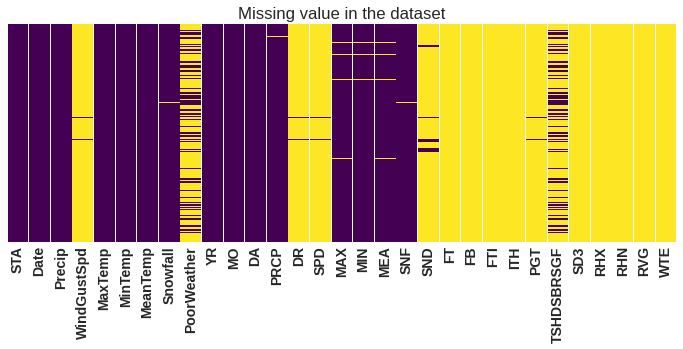

In [56]:
plt.figure(figsize=(12,4))
sns.heatmap(climate.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [57]:
climate.columns.values

array(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP',
       'DR', 'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI',
       'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype=object)

### Cleaning the Dataset

We are going to remove and clean null values from our dataset

In [58]:
to_drop=['Precip','STA','Date','WindGustSpd','Snowfall','PoorWeather', 'PRCP', 'DR', 'SPD', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']
climate.drop(to_drop,inplace=True,axis=1)

In [59]:
climate.head(10)

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0
5,26.666667,21.666667,24.444444,42,7,6,80.0,71.0,76.0
6,28.333333,22.777778,25.555556,42,7,7,83.0,73.0,78.0
7,26.666667,22.222222,24.444444,42,7,8,80.0,72.0,76.0
8,27.222222,22.777778,25.000000,42,7,9,81.0,73.0,77.0
9,25.555556,21.666667,23.333333,42,7,10,78.0,71.0,74.0


In [60]:
climate=climate[~climate['MAX'].isna()]

In [61]:
climate=climate[~climate['MIN'].isna()]

In [62]:
climate=climate[~climate['MEA'].isna()]

In [63]:

climate=climate[~climate['MaxTemp'].isna()]

In [64]:

climate=climate[~climate['MinTemp'].isna()]

In [65]:

climate=climate[~climate['MeanTemp'].isna()]

In [66]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118540 entries, 0 to 119039
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   118540 non-null  float64
 1   MinTemp   118540 non-null  float64
 2   MeanTemp  118540 non-null  float64
 3   YR        118540 non-null  int64  
 4   MO        118540 non-null  int64  
 5   DA        118540 non-null  int64  
 6   MAX       118540 non-null  float64
 7   MIN       118540 non-null  float64
 8   MEA       118540 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 9.0 MB


### Plots

### Correlation plot

Correlation plots, also known as correlograms for more than two variables, help us to visualize the correlation between continuous variables.

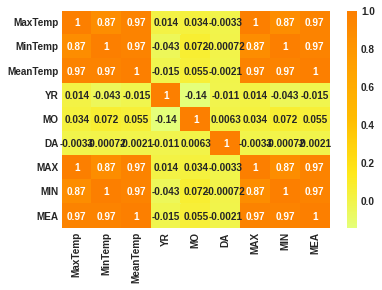

In [38]:
corr = climate.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

#### Data Visualization

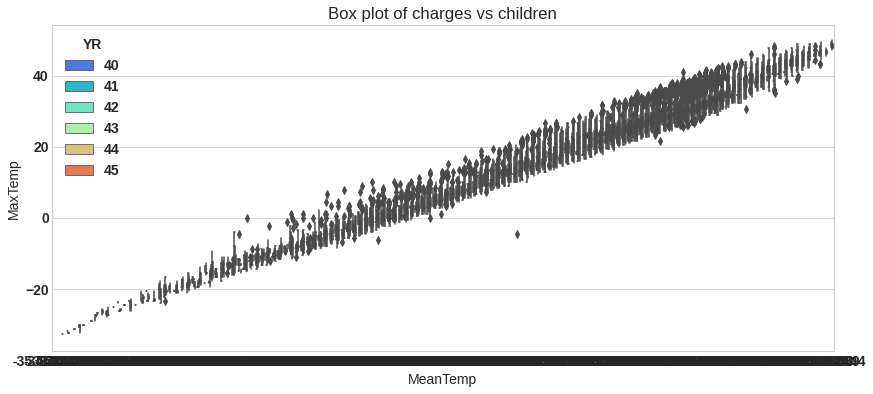

In [70]:
plt.figure(figsize=(14,6))
sns.boxplot(x='MeanTemp', y='MaxTemp',hue='YR',data=climate,palette='rainbow')
plt.title('Box plot of Max and Mean Temperatures');

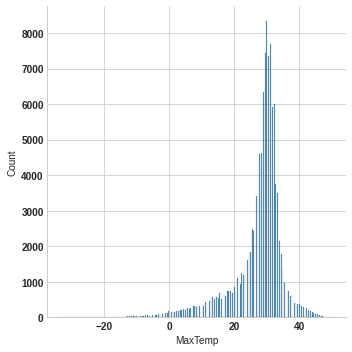

In [ ]:
sns.displot(climate['MaxTemp'],kde=False)

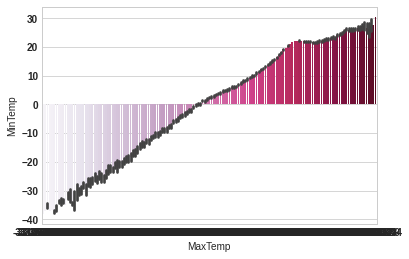

In [ ]:
sns.barplot(x = 'MaxTemp', y = 'MinTemp', data =climate,
            palette = 'PuRd')
plt.show()

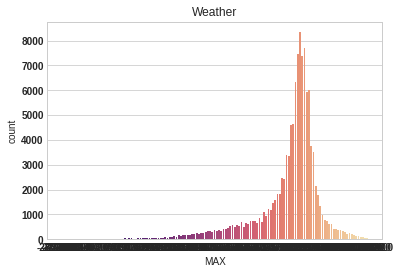

In [ ]:
sns.countplot(x = 'MAX', data = climate, palette = 'magma')
plt.title('Weather')
plt.show()

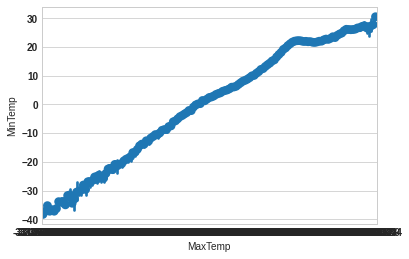

In [ ]:
sns.pointplot(x="MaxTemp", y="MinTemp", data=climate)
plt.show()

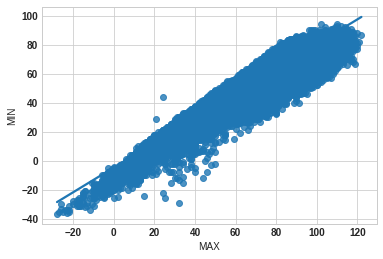

In [ ]:
sns.regplot(x="MAX", y="MIN", data=climate)

In [ ]:
sns.heatmap(climate.corr());# Rotate x-labels with the help of matplotlib
plt.xticks(rotation=-45);

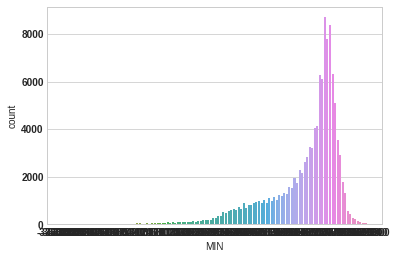

In [26]:
sns.countplot(x='MIN',data=climate)

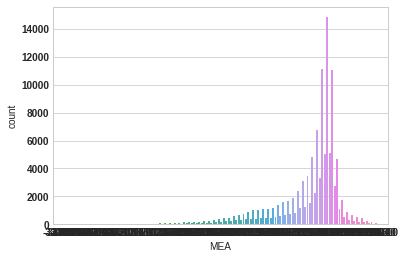

In [27]:
sns.countplot(x='MEA',data=climate)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39de553f10>,
      dtype=object)

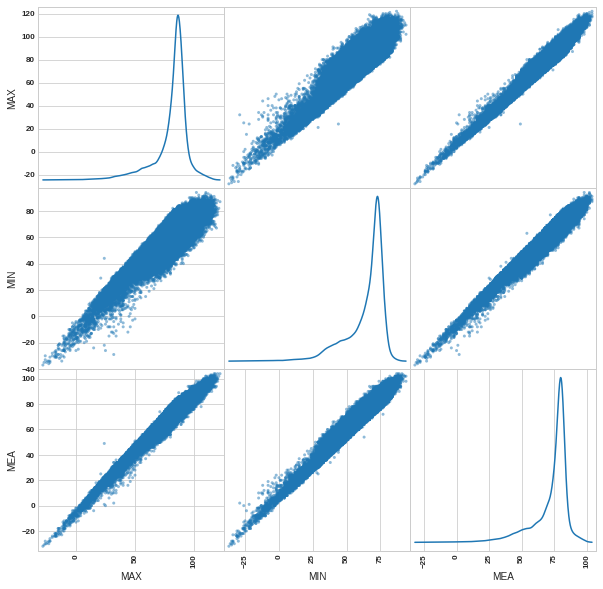

In [28]:
cols=['MAX','MIN','MEA']
pd.plotting.scatter_matrix(climate[cols], figsize = (10, 10), diagonal = 'kde')

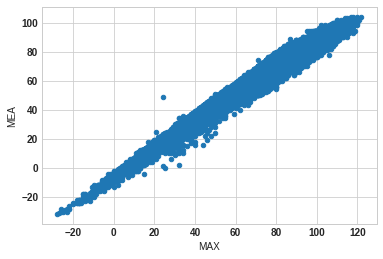

In [29]:
climate.plot.scatter(x="MAX", y="MEA")

### Splitting the dataset into train and test

Train-Test Split Evaluation. The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm. The procedure involves taking a dataset and dividing it into two subsets.

In [30]:
y =climate['MaxTemp']

In [31]:
X=climate.drop(columns=['MaxTemp'])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state=0)

Importing linear regression model from sklearn to train the simple regression model

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

#### Prediction of the results

In [34]:
y_pred= regressor.predict(X_test)
print(y_pred)

[26.66666667 29.44444444 18.88888889 ... 27.77777778 29.44444444
 28.88888889]


## Accuracy score

In [35]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

1.0